# CTI Expert: Fine-Tuning LLMs for Cyber Threat Intelligence Notebook


🛠️ Customize and Fine-Tune the Model[ Here](#4-model-fine-tuning)


📈 [CTIBench](CTIBench%20Paper.pdf): A Benchmark for Evaluating LLMs in Cyber Threat Intelligence



## 1. Introduction



### 1.1. Background
In today's world, cybersecurity is more important than ever. Organizations face constant cyber threats, and Cyber Threat Intelligence (CTI) helps them understand and respond to these threats. CTI provides crucial information that allows companies to protect their critical systems.

Large Language Models (LLMs), like GPT-3 and LLaMA, have shown promise in analyzing large amounts of text. These models can assist with various CTI tasks, such as detecting threats and analyzing vulnerabilities. However, LLMs often struggle with specialized tasks like CTI, where accuracy is crucial. Sometimes, they produce incorrect or misleading information, which is especially dangerous in cybersecurity.

### 1.2. Problem Statement
Although LLMs are good at general text processing, they need specialized benchmarks to see how well they perform in CTI tasks. Current benchmarks don’t fully capture the unique challenges of cybersecurity, such as the need for high accuracy and relevance. Without these benchmarks, it's hard to know how useful LLMs are in real-world cybersecurity scenarios.

### 1.3. Project Overview
This project aims to fine-tune a pre-trained LLM using CTI-specific data and evaluate its performance with **CTIBench**, a benchmark designed for cybersecurity tasks. CTIBench helps assess how well the model performs on tasks like identifying threat actors, mapping attack techniques, and correlating vulnerabilities. The project involves these steps:
1. **Data Collection:** Gathering CTI data from reliable sources.
2. **Data Preparation:** Cleaning and organizing the data for effective model training.
3. **Model Fine-Tuning:** Adapting a pre-trained LLM to focus on CTI tasks using the prepared dataset.
4. **Benchmark Evaluation:** Using CTIBench to thoroughly test the fine-tuned model's performance.
5. **Analysis and Insights:** Examining the results to identify where the model excels and where it can improve, with a focus on its real-world application in cybersecurity.

### 1.4. Objectives
The main goals of this project are:
- To create a high-quality CTI dataset for fine-tuning LLMs.
- To fine-tune an LLM specifically for CTI tasks.
- To evaluate the model’s performance using CTIBench, ensuring it meets the high standards required in cybersecurity.
- To provide insights into how well LLMs work in CTI, highlighting their strengths and weaknesses.
- To advance AI tools in cybersecurity by offering suggestions for future research and development.


### 1.5. Significance
By fine-tuning LLMs with CTI data and evaluating them with CTIBench, this project aims to improve the accuracy and reliability of AI tools in cybersecurity. The results will help create better CTI applications, allowing organizations to more effectively predict, identify, and respond to cyber threats. This project also contributes to AI research by providing a specialized evaluation framework that could be used in other fields as well.


## 2. Data Collection



The data collection phase is critical for building a robust and comprehensive dataset to fine-tune the Large Language Model (LLM) for Cyber Threat Intelligence (CTI). This project involves collecting data from multiple authoritative sources related to cybersecurity threats, vulnerabilities, and attack techniques.


### 2.1. CVE Data



**Source**: [National Vulnerability Database (NVD)](https://nvd.nist.gov)

**Description**: The Common Vulnerabilities and Exposures (CVE) system provides a reference-method for publicly known information-security vulnerabilities and exposures. CVE data is crucial for understanding vulnerabilities that could be exploited in cyber-attacks.

**Columns**:
- **CVE_ID**: Unique identifier for the vulnerability (e.g., CVE-2023-12345).
- **Description**: A brief description of the vulnerability.
- **Date_Published**: The date when the vulnerability was published.
- **CVSS_Vector_String**: The Common Vulnerability Scoring System vector string that describes the vulnerability's characteristics.
- **CWE_IDs**: The Common Weakness Enumeration (CWE) IDs associated with the vulnerability.
- **Hyperlinks**: Links to additional information or references about the vulnerability.


#### 2.1.1 Scraping Technique
- **Tools**: `requests`, `BeautifulSoup`
- **Process**:
  1. Send HTTP requests to the CWE website using the `requests` library.
  2. Use `BeautifulSoup` to parse and extract the relevant data from the HTML content.
  3. Organize the extracted data into the specified columns.
  4. Store the data in a CSV file

In [ ]:
from Scrap.CVE_scrap.scrap_cve_data import scrap_cve_data_from_links
from Scrap.CVE_scrap.scrape_cve_links import scrape_all_cve_links


cve_links = scrape_all_cve_links()

output_cve_data="cve_detailed_data.csv"
scrap_cve_data_from_links(cve_links,output_cve_data)




#### 2.1.2 Summarize data scraped

##### 2.1.2.1 Row exemple 

In [43]:
import pandas as pd
from IPython.display import HTML

df = pd.read_csv("Data/cve_data.csv")
df = df.iloc[:, 1:]

html_table = df.head(1).to_html(index=False)
display(HTML(html_table))

CVE_ID,Description,Date_Published,CVSS_Vector_String,CWE_IDs,Hyperlinks
CVE-2022-32925,"An out-of-bounds write issue was addressed with improved bounds checking. This issue is fixed in tvOS 16, iOS 16, watchOS 9. An app may be able to cause unexpected system termination or write kernel memory.",2022-11-01,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:H/A:H,CWE-787,"https://support.apple.com/en-us/HT213446, https://support.apple.com/en-us/HT213486, https://support.apple.com/en-us/HT213487"


##### 2.1.2.2 Stats  

In [18]:
from matplotlib import pyplot as plt
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML

# Load data
df = pd.read_csv("Data\collected_data\cve_data.csv")
df['Date_Published'] = pd.to_datetime(df['Date_Published'], errors='coerce')

# Metrics calculation
date_range = df['Date_Published'].agg(['min', 'max'])
distinct_cve_count = df['CVE_ID'].nunique()
df['CWE_IDs'] = df['CWE_IDs'].astype(str)
cwe_ids = df['CWE_IDs'].str.split(',', expand=True).stack()
distinct_cwe_count = cwe_ids.nunique()

# Create consolidated table
metrics_table = [
    ['Date Range', 'Min Date', date_range['min'].strftime('%Y-%m-%d')],
    ['Date Range', 'Max Date', date_range['max'].strftime('%Y-%m-%d')],
    ['Distinct CVE_IDs', '', distinct_cve_count],
    ['Distinct CWE_IDs', '', distinct_cwe_count]
]

# Convert to HTML table
html_metrics_table = tabulate(metrics_table, headers=['Metric', 'Detail', 'Value'], tablefmt='html', stralign='center')

# Display the table
display(HTML(html_metrics_table))


Metric,Detail,Value
Date Range,Min Date,2019-10-23
Date Range,Max Date,2023-11-30
Distinct CVE_IDs,,73919
Distinct CWE_IDs,,857


##### 2.1.2.3 Distribution of CVEs Over Time

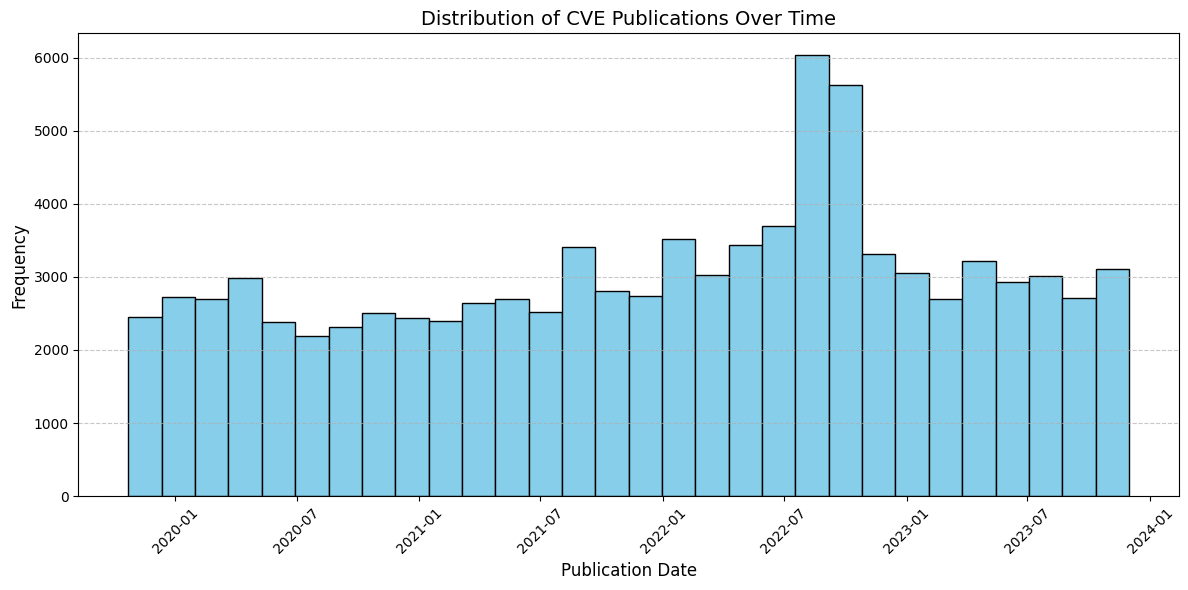

In [14]:
# Plot distribution of CVE publications over time
plt.figure(figsize=(12, 6))
plt.hist(df['Date_Published'], bins=30, edgecolor='k', color='skyblue')
plt.title('Distribution of CVE Publications Over Time', fontsize=14)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.2. CWE Data 



#### 2.2.1. Description
The Common Weakness Enumeration (CWE) dataset provides a list of software weaknesses that can lead to vulnerabilities. The dataset includes the following columns:
- **ID**: The unique identifier for the weakness.
- **Description**: A brief description of the weakness.
- **Extended Description**: A detailed description providing more context about the weakness.
- **References**: External references or resources related to the weakness.

#### 2.2.2. Data Source
- **Source**: [CWE - MITRE](https://cwe.mitre.org)

#### 2.2.3. Scraping Technique
- **Tools**: `requests`, `BeautifulSoup`
- **Process**:
  1. Send HTTP requests to the CWE website using the `requests` library.
  2. Use `BeautifulSoup` to parse and extract the relevant data from the HTML content.
  3. Organize the extracted data into the specified columns.
  4. Store the data in a CSV file or database.

In [ ]:
import pandas as pd

from Scrap.CWE_scrap.scarape_cwe import get_cwe_ids, scrape_cwe_data


id_list_filename = 'Data\logs\cwec_v4.15.xml'  
list_of_cwe_ids = get_cwe_ids(id_list_filename)

scraped_data = []

for cwe_id in list_of_cwe_ids:
    data = scrape_cwe_data(cwe_id)
    if data:
        scraped_data.append(data)

cwe_data = pd.Dataframe(scraped_data)
cwe_data.to_csv("Data\cwe_data.csv")


#### 2.2.2 Summarize data scraped

##### 2.2.2.1 Row exemple 

In [4]:
from IPython.display import HTML
import pandas as pd

cwe_data = pd.read_csv("Data\collected_data\cwe_data.csv")

cwe_data["ID"] = cwe_data["ID"].apply(lambda x: f"CWE-{x}")


html_table = cwe_data.head(1).to_html(index=False)

display(HTML(html_table))

ID,Description,Extended Description,References
CWE-1004,"The product uses a cookie to store sensitive information, but the cookie is not marked with the HttpOnly flag.","The HttpOnly flag directs compatible browsers to prevent client-side script from accessing cookies. Including the HttpOnly flag in the Set-Cookie HTTP response header helps mitigate the risk associated with Cross-Site Scripting (XSS) where an attacker's script code might attempt to read the contents of a cookie and exfiltrate information obtained. When set, browsers that support the flag will not reveal the contents of the cookie to a third party via client-side script executed via XSS.","['https://owasp.org/www-community/HttpOnly', 'https://learn.microsoft.com/en-us/previous-versions/ms972826(v=msdn.10)?redirectedfrom=MSDN', 'https://www.troyhunt.com/c-is-for-cookie-h-is-for-hacker/', 'https://learn.microsoft.com/en-us/previous-versions//ms533046(v=vs.85)?redirectedfrom=MSDN']"


##### 2.2.2.2 Stats  

In [39]:
import pandas as pd

# Number of distinct CVE_ID values
distinct_cve_count = cwe_data['ID'].nunique()

# Prepare the data for tabulate
table_data = [['Distinct CWE_IDs', distinct_cwe_count]]

# Convert to HTML using tabulate
html_table = tabulate(table_data, headers=['Metric', 'Value'], tablefmt='html', stralign='center')

# Display the HTML table
display(HTML(html_table))

Metric,Value
Distinct CWE_IDs,857


### 2.3. Attack Patterns (Techniques) 



#### 2.3.1. Description
The dataset for attack patterns, also known as techniques, includes detailed information on how adversaries carry out attacks. The dataset includes the following fields:
- **ID**: The unique identifier for the technique.
- **Technique Name**: The name of the technique.
- **Description**: A description of how the technique is executed.
- **Platforms**: The platforms targeted by the technique.
- **Detection**: Methods for detecting the technique.
- **Defense Bypassed**: A list of defenses that can be bypassed using the technique.
- **Kill Chain Phases**: A list of Kill Chain Phases, each containing `kill_chain_name` and `phase_name`.
- **Related Malwares**: A list of Malwares, each containing `ID`, `Malware Name`, and `comment`.
- **Related Tools**: A list of Tools, each containing `ID`, `Tool Name`, and `comment`.
- **Related Intrusion Sets**: A list of Intrusion Sets, each containing `ID`, `intrusion set name`, and `comment`.
- **Related Campaigns**: A list of Campaigns, each containing `ID`, `Campaign Name`, and `comment`.
- **Mitigations**: A list of Mitigations, each containing `ID`, `Course of Action Name`, `Description`, and `comment`.

#### 2.3.2. Data Source
- **Source**: [MITRE ATT&CK](https://attack.mitre.org)

#### 2.3.3. Scraping Technique
- **Tools**: `requests`, `BeautifulSoup`, `Selenium`
- **Process**:
  1. Send HTTP requests using the `requests` library to retrieve the web pages from the ATT&CK framework.
  2. Use `BeautifulSoup` to parse static content. For dynamic content or complex interactions, use `Selenium` to automate web browsing and extract data.
  3. Parse the data into the defined fields, handling nested structures for related malwares, tools, intrusion sets, campaigns, and mitigations.
  4. Save the structured data in a suitable format, such as JSON or a database.

In [ ]:


from Scrap.Techniques_scrap.techniques_scrap import extract_techniques_base_data, populate_attack_patterns_with_scrapped_data, scrap_data_related_to_techniques


data='data/STIX_enterprise_attack.json'
techniques_base_data = extract_techniques_base_data(data)


attack_patterns, intrusion_sets, campaigns , malwares , tools , course_of_actions =  scrap_data_related_to_techniques(techniques_base_data)

attack_patterns = populate_attack_patterns_with_scrapped_data(attack_patterns,malwares,tools,intrusion_sets,campaigns,course_of_actions)


#### 2.3.4 Summarize data scraped

#### 2.3.4.1 Stats

In [55]:

import json
import pandas as pd

with open('Data/Full_attack_patterns_data.json', 'r') as file:
    data = json.load(file)
# Count the number of objects
if isinstance(data, list):
    num_objects = len(data)
elif isinstance(data, dict):
    num_objects = len(data)  # Adjust based on the actual structure
else:
    num_objects = 0
from IPython.display import HTML, display
# Prepare the data for tabulate
table_data = [['Number of techniques', num_objects]]

# Convert to HTML using tabulate
html_table = tabulate(table_data, headers=['Metric', 'Value'], tablefmt='html', stralign='center')

# Display the HTML table
display(HTML(html_table))


Metric,Value
Number of techniques,780


#### 2.3.4.2 Exemple of technique data scrapped


In [56]:
def format_json(data, indent=4):
    """Format JSON data with indentation and syntax highlighting"""
    formatted_json = json.dumps(data, indent=indent)
    formatted_json = formatted_json.replace("  ", "&nbsp;&nbsp;")
    return f"<pre style='font-size: 12px;padding: 10px; border: 1px solid #ddd;'>{formatted_json}</pre>"

# Get the first object (assuming the JSON is a list of objects)
first_object = data[120] if isinstance(data, list) and len(data) > 0 else data

# Print the formatted JSON
formatted_json = format_json(first_object)
print("exemple of technique data scrapped :")
display(HTML(formatted_json))

exemple of technique data scrapped


### 2.4. CAPEC Data 



#### 2.4.1. Description
The Common Attack Pattern Enumeration and Classification (CAPEC) dataset categorizes attack patterns to help understand the nature of attacks. The dataset includes the following columns:
- **ID**: The unique identifier for the attack pattern.
- **Name**: The name of the attack pattern.
- **Abstraction**: The level of abstraction (e.g., meta, detailed).
- **Status**: The current status (e.g., draft, stable).
- **Description**: A description of the attack pattern.
- **Alternate Terms**: Other terms used to describe the attack pattern.
- **Likelihood Of Attack**: The likelihood of this attack pattern being used.
- **Typical Severity**: The typical severity of attacks using this pattern.
- **Related Attack Patterns**: Attack patterns related to this one.
- **Execution Flow**: Steps or procedures to execute the attack.
- **Prerequisites**: Conditions that must be met for the attack to be successful.
- **Skills Required**: Skills needed to execute the attack.
- **Resources Required**: Resources required for the attack.
- **Indicators**: Signs that the attack is happening or has happened.
- **Consequences**: Possible consequences of the attack.
- **Mitigations**: Steps that can be taken to mitigate the attack.
- **Example Instances**: Examples of real-world instances where the attack has been used.
- **Related Weaknesses**: Weaknesses associated with the attack pattern.
- **Taxonomy Mappings**: How the attack pattern maps to other taxonomies.
- **Notes**: Additional notes.

#### 2.4.2. Data Source
- **Source**: [CAPEC - MITRE](https://capec.mitre.org)

#### 2.4.3. Scraping Technique
- **Tools**: Direct download in CSV format from the official website.
- **Process**:
  1. Access the CAPEC website and download the CSV file containing the attack pattern data.
  2. Load the CSV file into a data processing environment (e.g., Pandas in Python).
  3. Perform any necessary data cleaning or restructuring to ensure consistency with the other datasets.
  4. Store the processed data for further use in model fine-tuning.

In [2]:
import pandas as pd
capec = pd.read_csv("Data\CAPEC.csv")

#### 2.4.4 Summarize data scraped

#### 2.3.4.1 Row exemple 

In [5]:
from IPython.display import HTML
html_table = capec.head(1).to_html(index=False)
display(HTML(html_table))

ID,Name,Abstraction,Status,Description,Alternate Terms,Likelihood Of Attack,Typical Severity,Related Attack Patterns,Execution Flow,Prerequisites,Skills Required,Resources Required,Indicators,Consequences,Mitigations,Example Instances,Related Weaknesses,Taxonomy Mappings,Notes
Accessing Functionality Not Properly Constrained by ACLs,Standard,Draft,"In applications, particularly web applications, access to functionality is mitigated by an authorization framework. This framework maps Access Control Lists (ACLs) to elements of the application's functionality; particularly URL's for web apps. In the case that the administrator failed to specify an ACL for a particular element, an attacker may be able to access it with impunity. An attacker with the ability to access functionality not properly constrained by ACLs can obtain sensitive information and possibly compromise the entire application. Such an attacker can access resources that must be available only to users at a higher privilege level, can access management sections of the application, or can run queries for data that they otherwise not supposed to.",NaN,High,High,::NATURE:ChildOf:CAPEC ID:122::NATURE:CanPrecede:CAPEC ID:17::,"::STEP:1:PHASE:Explore:DESCRIPTION:[Survey] The attacker surveys the target application, possibly as a valid and authenticated user:TECHNIQUE:Spidering web sites for all available links:TECHNIQUE:Brute force guessing of resource names:TECHNIQUE:Brute force guessing of user names / credentials:TECHNIQUE:Brute force guessing of function names / actions::STEP:2:PHASE:Explore:DESCRIPTION:[Identify Functionality] At each step, the attacker notes the resource or functionality access mechanism invoked upon performing specific actions:TECHNIQUE:Use the web inventory of all forms and inputs and apply attack data to those inputs.:TECHNIQUE:Use a packet sniffer to capture and record network traffic:TECHNIQUE:Execute the software in a debugger and record API calls into the operating system or important libraries. This might occur in an environment other than a production environment, in order to find weaknesses that can be exploited in a production environment.::STEP:3:PHASE:Experiment:DESCRIPTION:[Iterate over access capabilities] Possibly as a valid user, the attacker then tries to access each of the noted access mechanisms directly in order to perform functions not constrained by the ACLs.:TECHNIQUE:Fuzzing of API parameters (URL parameters, OS API parameters, protocol parameters)::","::The application must be navigable in a manner that associates elements (subsections) of the application with ACLs.::The various resources, or individual URLs, must be somehow discoverable by the attacker::The administrator must have forgotten to associate an ACL or has associated an inappropriately permissive ACL with a particular navigable resource.::","::SKILL:In order to discover unrestricted resources, the attacker does not need special tools or skills. They only have to observe the resources or access mechanisms invoked as each action is performed and then try and access those access mechanisms directly.:LEVEL:Low::",::None: No specialized resources are required to execute this type of attack.::,NaN,::SCOPE:Confidentiality:SCOPE:Access Control:SCOPE:Authorization:TECHNICAL IMPACT:Gain Privileges::,"::In a J2EE setting, administrators can associate a role that is impossible for the authenticator to grant users, such as NoAccess, with all Servlets to which access is guarded by a limited number of servlets visible to, and accessible by, the user. Having done so, any direct access to those protected Servlets will be prohibited by the web container. In a more general setting, the administrator must mark every resource besides the ones supposed to be exposed to the user as accessible by a role impossible for the user to assume. The default security setting must be to deny access and then grant access only to those resources intended by business logic.::","::Implementing the Mod

#### 2.3.4.2 Stats

In [7]:
import pandas as pd
from tabulate import tabulate

# Number of distinct CVE_ID values
distinct_CAPEC_count = len(capec)

# Prepare the data for tabulate
table_data = [['Distinct CAPECs', distinct_CAPEC_count]]

# Convert to HTML using tabulate
html_table = tabulate(table_data, headers=['Metric', 'Value'], tablefmt='html', stralign='center')

# Display the HTML table
display(HTML(html_table))

Metric,Value
Distinct CAPECs,559


### 2.5. Reports Data 



#### 2.5.1. Description
The reports dataset contains detailed threat or attack reports that explain the techniques used and Indicators of Compromise (IOCs) associated with specific cyber incidents. In these reports, the name of the group actor responsible for the attack is anonymized and replaced with a placeholder `[PLACEHOLDER]`. The dataset includes the following columns:
- **Report**: The full text of the report, with the actor's name hidden by `[PLACEHOLDER]`.
- **Group Actor Name**: The name of the group responsible for the attack, which will be used to replace the placeholder.

#### 2.5.2. Data Source
- **Source**: Various cybersecurity websites, blogs, and reports from reputable cybersecurity firms and organizations.




#### 2.5.3. Scraping Technique
- **Tools**: `Selenium`, `Google Genimi`
- **Process**:
  1. **Get List of Actors**: Extract a list of attackers (cyber threat actors) registered in MITRE ATT&CK to use as a reference for identifying relevant reports.
  2. **Identify Sources**: Use `Selenium` to extract URLs of relevant reports from Google News. Due to HTTP request restrictions on Google News, automated scraping tools are required to navigate and extract links.
  3. **Extract the Report**: Utilize `Selenium` to access each URL obtained from Google News. Given the varied structure of report pages, use `Google Genimi` to accurately extract the report content from the `<body>` of the website. During extraction, replace occurrences of the group's name or any known aliases with `[PLACEHOLDER]`.
  4. **Data Validation**: Apply validation using the `Google Genimi` model to ensure the extracted content meets quality standards. The validation criteria include:
     - Must contain detailed information about techniques.
     - Should include Indicators of Compromise (IOCs).
     - Should provide hints or insights related to the actor responsible for the attack.
  5. **Store the Data**: Save the validated reports and corresponding actor names in a structured format, such as CSV or JSON, with two columns: `Report` and `Group Actor Name`.

In [ ]:


from Scrap.Reports_scraper import deep_validation
from Scrap.Reports_scraper.reports_validation import scrap_reports
from Scrap.Reports_scraper.scrap_reports_links import get_existing_groups, scrap_reports_links


intrusion_sets='ATT&AK/intrusion_sets.json'
exicting_groups = get_existing_groups(intrusion_sets)

output_reports_links_csv = 'Data\logs\cve_links.csv'
scrap_reports_links(exicting_groups,output_reports_links_csv)

output_reports_data_tsv = 'Data\logs\reports_data_tsv'
scrap_reports(output_reports_links_csv,output_reports_data_tsv)


final_reports = r"Data\collected_data"
deep_validation(output_reports_data_tsv ,final_reports)

#### 2.5.4. Summarize data scraped

In [13]:
reports = pd.read_csv(r"Data\rapports_data.csv")


##### 2.5.4.1 Row exemple

In [15]:
from IPython.display import HTML
html_table = reports.tail(1).to_html(index=False)
display(HTML(html_table))

##### 2.5.4.1 Stats

In [17]:
from IPython.display import HTML, display

num_objects = len(reports)
# Prepare the data for tabulate
table_data = [['Number of clean reports scrapped', num_objects]]

# Convert to HTML using tabulate
html_table = tabulate(table_data, headers=['Metric', 'Value'], tablefmt='html', stralign='center')

# Display the HTML table
display(HTML(html_table))

Metric,Value
Number of clean reports scrapped,251


### 2.6. MCQ Data Collection and Generation



#### 2.6.1. Description
This section focuses on generating multiple-choice questions (MCQs) from various cyber threat intelligence datasets, including attack patterns, CWE, CVE, and CAPEC.

#### 2.6.2. MCQ Fields
Each MCQ will consist of the following fields:
- **Reference**: The source or dataset from which the MCQ was derived (e.g., Attack Patterns, CWE, CVE, CAPEC) ids.
- **Question**: The question to be answered.
- **Option A**: First possible answer.
- **Option B**: Second possible answer.
- **Option C**: Third possible answer.
- **Option D**: Fourth possible answer.
- **Correct Answer**: The correct option among A, B, C, or D.
- **Explanation**: An explanation of why the answer is correct.

#### 2.6.3. Data Sources
- **Attack Patterns**: [MITRE ATT&CK](https://attack.mitre.org)
- **CWE**: [CWE - MITRE](https://cwe.mitre.org)
- **CVE**: [NVD - National Vulnerability Database](https://nvd.nist.gov)
- **CAPEC**: [CAPEC - MITRE](https://capec.mitre.org)





#### 2.6.4. Generating MCQs
- **Tools**: `Google Genimi`
- **Process**:
  1. **Extract Data**: Use the previously collected and processed data from Attack Patterns, CWE, CVE, and CAPEC datasets.
  2. **Generate Questions**: Utilize the `Google Genimi` model to generate MCQs based on the extracted data. The model will be used to:
     - Formulate questions related to specific data points from the datasets.
     - Create multiple-choice options for each question.
     - Identify the correct answer and provide an explanation.
  3. **Format MCQs**: Structure the generated questions and answers according to the specified MCQ format:
     - **Reference**: Indicate the dataset or source.
     - **Question**: Create a clear and concise question.
     - **Options A-D**: Generate plausible options.
     - **Correct Answer**: Mark the correct option.
     - **Explanation**: Provide a detailed explanation for the correct answer.
  4. **Review and Validate**: Ensure that the generated MCQs are accurate, relevant, and correctly formatted.
  5. **Store the Data**: Save the MCQs in a structured format, such as CSV or JSON, with fields for Reference, Question, Options, Correct Answer, and Explanation.

In [ ]:
from Scrap.QCM_generating.data_processing import take_random_rows


cve_data_csv = 'data\cve_detailed_data_v2.csv'
CAPEC_data_csv = 'data\CAPEC.csv'
cwe_data = 'data\cwe_data.csv'

cwe_data = pd.read_csv(cwe_data)
CAPEC_data = pd.read_csv(CAPEC_data_csv)
cve_data = take_random_rows(cve_data_csv,3000)
attack_patterns_data = attack_patterns

In [ ]:
from Scrap.QCM_generating.generate_capec_related import generate_capec_qcm
from Scrap.QCM_generating.generate_cve_related import generate_cves_qcm
from Scrap.QCM_generating.generate_cwe_related import generate_cwes_qcm
from Scrap.QCM_generating.generate_techniques_related import generate_techniques_qcm


cwes_qcms = generate_cwes_qcm(cwe_data)

cves_qcms = generate_cves_qcm(cve_data)

CAPEC_qcms = generate_capec_qcm(CAPEC_data)

techniques_qcms = generate_techniques_qcm(attack_patterns_data)




#### 2.6.5. **Summarize** data generated

##### 2.6.5.1 Row Exemple 

In [3]:
from IPython.display import HTML, display
import json
with open(r'Data\logs\QCM_TECHNIQUES.json', 'r') as file:
    data = json.load(file)
def format_json(data, indent=4):
    """Format JSON data with indentation and syntax highlighting"""
    formatted_json = json.dumps(data, indent=indent)
    formatted_json = formatted_json.replace("  ", "&nbsp;&nbsp;")
    return f"<pre style='font-size: 12px;padding: 10px; border: 1px solid #ddd;'>{formatted_json}</pre>"

# Get the first object (assuming the JSON is a list of objects)
first_object = data[2] if isinstance(data, list) and len(data) > 0 else data

# Print the formatted JSON
formatted_json = format_json(first_object)
display(HTML(formatted_json))

##### 2.6.5.2 Number Of Generated MCQ per Type

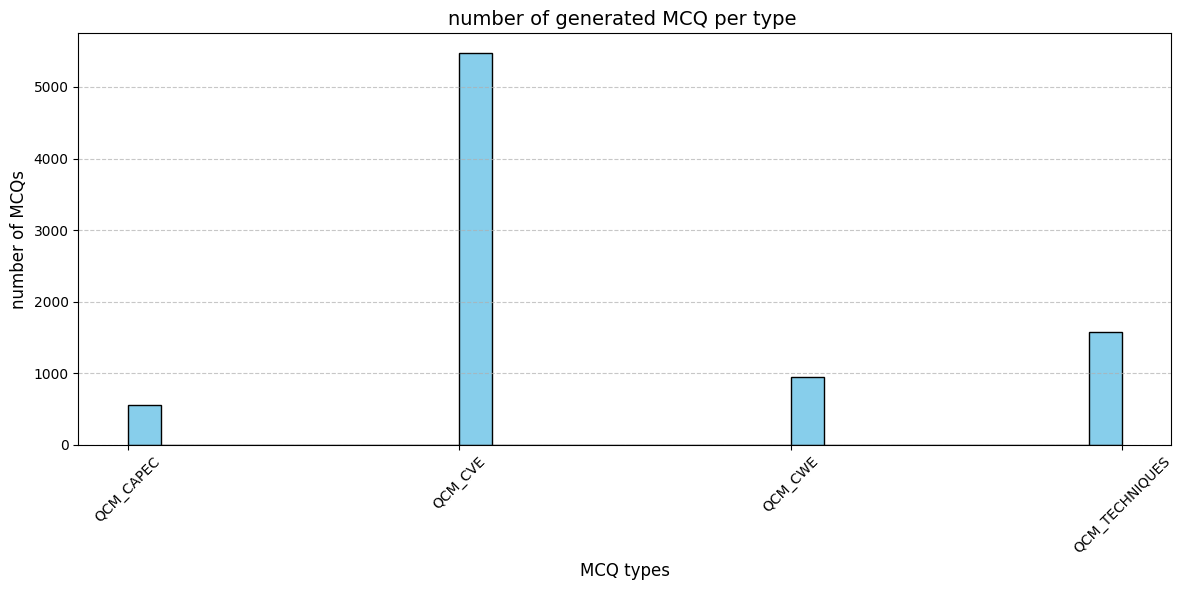

In [77]:

import pandas as pd
from tabulate import tabulate
from IPython.display import HTML, display
from matplotlib import pyplot as plt

data_files = ["QCM_CAPEC", "QCM_CVE", "QCM_CWE","QCM_TECHNIQUES"]
def preper_data(filename):

    new_df = pd.DataFrame()
    df = pd.read_json(f'Data\hidden\{filename}.json')
    new_df["Reference"] = df["Reference"]
    new_df["Question"] = df["Question"]
    new_df["Option A"] = df["Option A"]
    new_df["Option B"] = df["Option B"]
    new_df["Option C"] = df["Option C"]
    new_df["Option D"] = df["Option D"]
    new_df["Correct Answer"] = df["Correct Answer"]
    new_df["Explanation"] = df["Explanation"]
    new_df["qcm_type"] = filename
  
    return new_df

final_df = pd.DataFrame()
for filename in data_files : 
    im_df = preper_data(filename)
    final_df = pd.concat([final_df, im_df], ignore_index=True)


plt.figure(figsize=(12, 6))
plt.hist(final_df['qcm_type'], bins=30, edgecolor='k', color='skyblue')
plt.title('number of generated MCQ per type ', fontsize=14)
plt.xlabel('MCQ types', fontsize=12)
plt.ylabel('number of MCQs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### 2.6.6. Data Balancing

To ensure a balanced dataset, various QCMs (Questionnaire or Multiple Choice Questions) are combined and balanced using data augmentation techniques. The datasets involved are:

- **CWE QCMs**
- **CVE QCMs**
- **CAPEC QCMs**
- **Techniques QCMs**

### Balancing Process

The datasets are balanced using data augmentation techniques provided by the `AIDataAugment.TextAugmentor` library. This library assists in augmenting text datasets to address imbalances.

**Library**: `AIDataAugment.TextAugmentor`

The [TextAugmentor](https://github.com/FaroukDaboussi0/AIDataAugment/blob/master/README.md) library uses advanced  Google Gemini to reformulate questions, preserving their meaning while creating diverse variations. After augmentation, answer options are shuffled to ensure variety and quality. This approach effectively balances the dataset, preparing it for further analysis or training.


In [ ]:
from Scrap.QCM_generating.data_augmentation import balance_data


qcms = balance_data([cwes_qcms,cves_qcms,CAPEC_qcms,techniques_qcms])

##### 2.6.6.1 Number Of Generated MCQ per Type

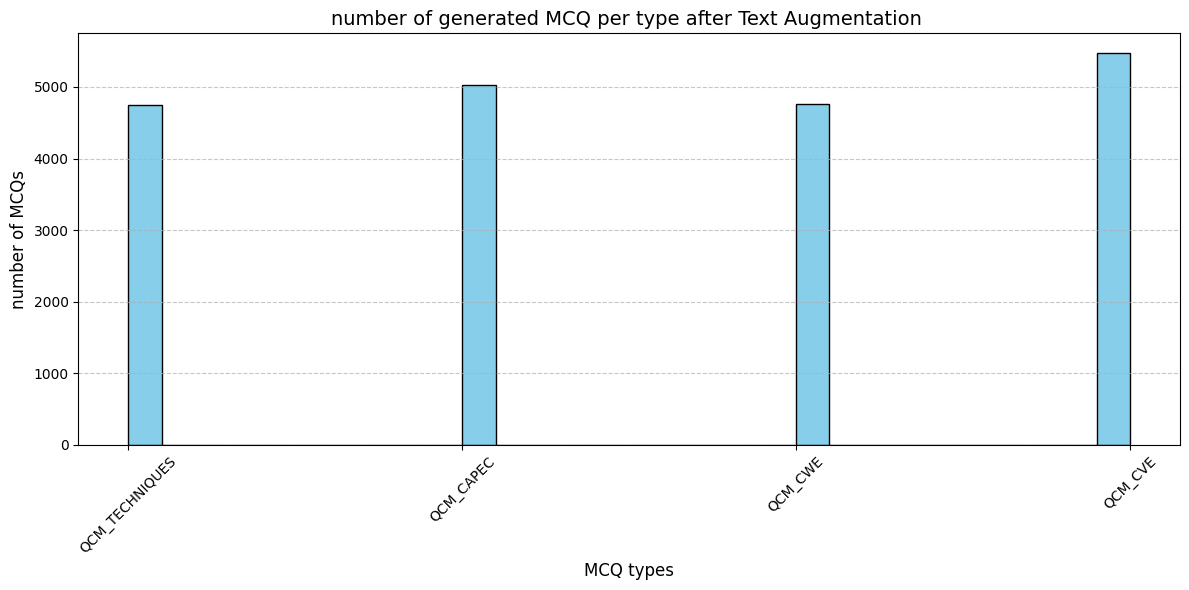

In [33]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset and drop the first column
qcms = pd.read_csv(r"Data\finetuning_data\MCQs_augmented.csv")
qcms = qcms.drop(qcms.columns[0], axis=1)

def get_type(text):
    if text.startswith("T"):
        return "QCM_TECHNIQUES"
    elif text.startswith("CAPEC"):
        return "QCM_CAPEC"
    elif text.startswith("CWE"):
        return "QCM_CWE"
    elif text.startswith("CVE"):
        return "QCM_CVE"
    else:
        return "UNKNOWN"  # Handle cases where the text does not match any criteria

# Apply the function to the 'Reference' column
qcms["type"] = qcms["Reference"].apply(get_type) 
plt.figure(figsize=(12, 6))
plt.hist(qcms['type'], bins=30, edgecolor='k', color='skyblue')
plt.title('number of generated MCQ per type after Text Augmentation ', fontsize=14)
plt.xlabel('MCQ types', fontsize=12)
plt.ylabel('number of MCQs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Data Preparation



### 3.1. Overview
In this phase, the collected data is prepared for evaluation based on the CTIBench benchmark. The data is organized into four distinct tasks: generating multiple-choice questions (MCQs), identifying related Common Weakness Enumerations (CWEs), associating reports with related actors, and linking descriptions to CVSS scores.

### 3.2. Data Preparation Tasks

#### 3.2.1. CTI_MCQs
- **Description**: Prepare data for generating multiple-choice questions related to cyber threat intelligence.
- **Fields**:
  - **Reference**: Source of the information used to create the MCQ (e.g., Attack Patterns, CWE, CVE, CAPEC).
  - **Question**: The question to be answered.
  - **Option A**: First possible answer.
  - **Option B**: Second possible answer.
  - **Option C**: Third possible answer.
  - **Option D**: Fourth possible answer.
  - **GT (Correct Answer)**: Ground truth for the correct answer.
- **Data Sources**: Extract from Attack Patterns, CWE, CVE, CAPEC datasets.
- **Process**:
  1. **Format Data**: Ensure each MCQ is formatted with all required fields.
  2. **Verify Accuracy**: Confirm that the correct answers are accurately labeled.

#### 3.2.2. CTI_RCM (Related CWE Mapping)
- **Description**: Map descriptions to related Common Weakness Enumerations (CWEs).
- **Fields**:
  - **Description**: The description of the cyber threat or vulnerability.
  - **GT (Related CWE)**: Ground truth for the related CWE(s).
- **Data Sources**: CWE dataset and related cyber threat descriptions.
- **Process**:
  1. **Match Descriptions**: Identify and associate descriptions with corresponding CWEs.
  2. **Validate Mapping**: Ensure that the ground truth CWEs accurately reflect the descriptions.

#### 3.2.3. CTI_TTA (Threat Actor Mapping)
- **Description**: Link threat reports to the related actors responsible for the attacks.
- **Fields**:
  - **Report**: The full text of the threat or attack report.
  - **GT (Related Actor)**: Ground truth for the actor responsible for the attack.
- **Data Sources**: Threat reports and MITRE ATT&CK actor list.
- **Process**:
  1. **Extract and Anonymize**: Extract reports and anonymize group names with `[PLACEHOLDER]`.
  2. **Map Actors**: Associate each report with the correct threat actor.
  3. **Verify Accuracy**: Ensure that the ground truth actors are correctly identified.

#### 3.2.4. CTI_VSP (Vulnerability Severity Prediction)
- **Description**: Link descriptions to CVSS (Common Vulnerability Scoring System) scores.
- **Fields**:
  - **Description**: The description of the vulnerability.
  - **GT (Related CVSS Score)**: Ground truth for the CVSS score.
- **Data Sources**: CVE dataset and associated vulnerability descriptions.
- **Process**:
  1. **Associate Descriptions**: Map vulnerability descriptions to their CVSS scores.
  2. **Validate Scores**: Confirm that the ground truth CVSS scores accurately reflect the descriptions.


In [ ]:

from Data_preparation.cti_mcq import preper_cti_mcq_to_train
from Data_preparation.cti_rcm import preper_cti_rcm_to_train
from Data_preparation.cti_tta import preper_cti_tta_to_train
from Data_preparation.cti_vsp import preper_cti_vsp_to_train


cve_data = r"Data\collected_data\cve_data.csv"
qcm_data = r"Data\logs\MCQs_augmented.csv"
reports_data = r"Data\collected_data\rapports_data.csv"


cti_rcm = r"Data\finetuning_data\cti-rcm.csv"
cti_vsp = r"Data\finetuning_data\cti-vsp.csv" 
cti_mcq = r"Data\finetuning_data\cti_mcq.csv"
cti_tta = r"Data\finetuning_data\cti_tta.csv"

preper_cti_rcm_to_train(cve_data,cti_rcm)

preper_cti_vsp_to_train(cve_data,cti_vsp)

preper_cti_mcq_to_train(qcm_data,cti_mcq)

preper_cti_tta_to_train(reports_data,cti_tta)




### 3.3. **Data visualisation**

##### 3.3.1 cti data distribution per type

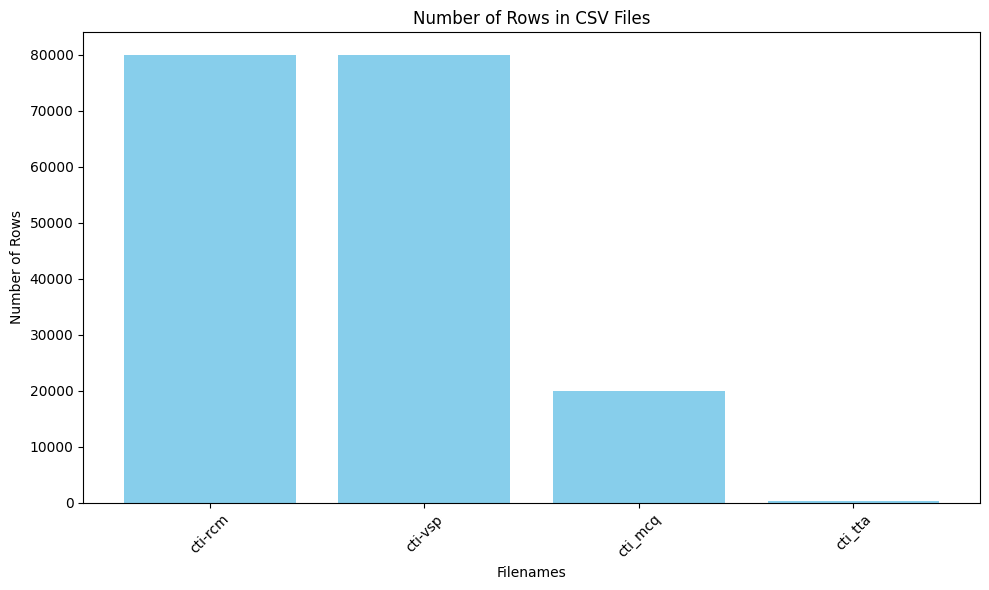

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV filenames
filenames = ["cti-rcm", "cti-vsp", "cti_mcq", "cti_tta"]

# Initialize lists to store filenames and lengths
file_names = []
file_lengths = []

# Iterate over the filenames
for filename in filenames:
    # Read the CSV file
    file_path = fr"Data\finetuning_data\{filename}.csv"
    df = pd.read_csv(file_path)
    
    # Append filename and number of rows to lists
    file_names.append(filename)
    file_lengths.append(len(df))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(file_names, file_lengths, color='skyblue')

# Add titles and labels
plt.xlabel('Filenames')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in CSV Files')
plt.xticks(rotation=45)  # Rotate filenames for better readability

# Show the plot
plt.tight_layout()
plt.show()


### 3.4. **Data Augmentation**

In [ ]:
from Data_preparation.Data_augmentation import balance_train_data


balance_train_data(cti_rcm, cti_vsp, cti_mcq, cti_tta)


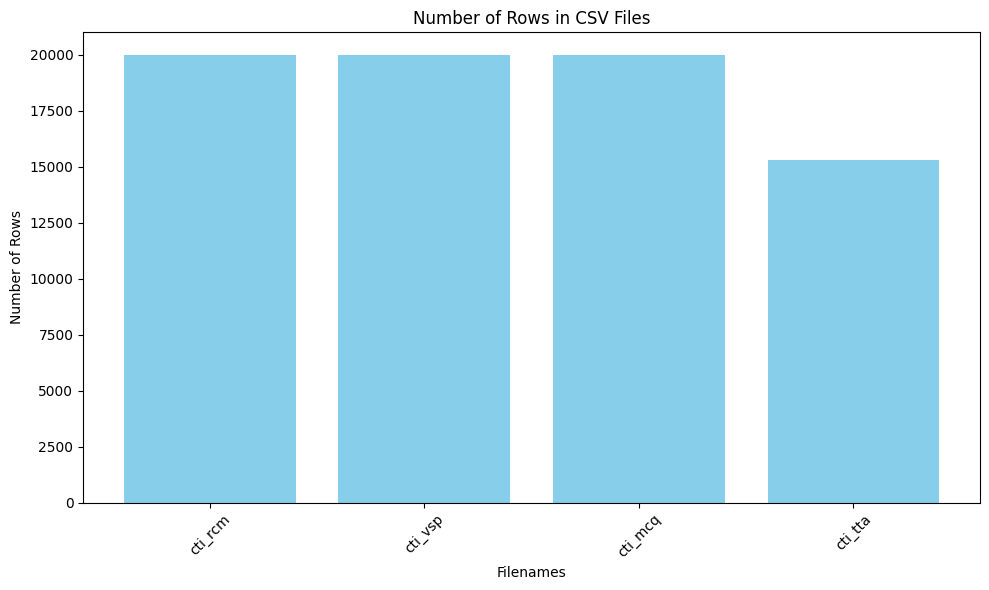

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV filenames
filenames = ["cti_rcm", "cti_vsp", "cti_mcq", "cti_tta"]

# Initialize lists to store filenames and lengths
file_names = []
file_lengths = []

# Iterate over the filenames
for filename in filenames:
    # Read the CSV file
    file_path = fr"Data\finetuning_data\balanced_data\{filename}.csv"
    df = pd.read_csv(file_path)
    
    # Append filename and number of rows to lists
    file_names.append(filename)
    file_lengths.append(len(df))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(file_names, file_lengths, color='skyblue')

# Add titles and labels
plt.xlabel('Filenames')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in CSV Files')
plt.xticks(rotation=45)  # Rotate filenames for better readability

# Show the plot
plt.tight_layout()
plt.show()


### 3.4. **Training Data** Preprocess 

In [9]:
from Data_preparation.preproces_cti_data_to_llm import preprocess_cti_data_to_llm


cti_rcm = fr"Data\finetuning_data\balanced_data\cti_rcm.csv"
cti_vsp = fr"Data\finetuning_data\balanced_data\cti_vsp.csv"
cti_mcq = fr"Data\finetuning_data\balanced_data\cti_mcq.csv"
cti_tta = fr"Data\finetuning_data\balanced_data\cti_tta.csv"
training_data = preprocess_cti_data_to_llm(cti_rcm, cti_vsp, cti_mcq, cti_tta)
training_data.to_csv(r"Data\finetuning_data\cti_training_data.csv", index=False)


### 3.5. **Training Data** Discovering

##### 3.5.1 Exemple Rows

In [13]:
import pandas as pd
import random
from IPython.display import display, HTML

# Load the dataset
training_data_path = r"Data\finetuning_data\cti_training_data.csv"
training_data = pd.read_csv(training_data_path)

# Select 3 random rows
random_rows = training_data.sample(n=3)

# Display the selected rows in a scrollable table
# Adjust the max-height to control the scroll area
display(HTML(random_rows.to_html(classes='table table-striped', index=False)))


Prompt,GT
"You are given a multiple-choice question (MCQ) from a Cyber Threat Intelligence (CTI) knowledge benchmark dataset. Your task is to choose the best option among the four provided. Return your answer as a single uppercase letter: A, B, C, or D. **Question:** How do attackers commonly capture user credentials during the authentication process on Windows systems using the Network Provider DLL technique? ? **Options:** A) Using a rootkit to intercept credential requests B) Modifying the `mpnotify.exe` process to redirect credentials C) Registering a malicious network provider DLL D) Exploiting a vulnerability in the `Winlogon` service **Important:** The last line of your answer should contain only the single letter corresponding to the best option, with no additional text.",C
"Analyze the following CVE description and calculate the CVSS v3.1 Base Score. Determine the values for each base metric: AV, AC, PR, UI, S, C, I, and A. Summarize each metric's value and provide the final CVSS v3.1 vector string. Ensure the final line of your response contains only the CVSS v3 Vector String in the following format: Example format: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H CVE Description: A vulnerability in the self-healing functionality of Cisco IOS XE Software for Embedded Wireless Controllers on Catalyst Access Points could allow an authenticated, local attacker to escape the restricted controller shell and execute arbitrary commands on the underlying operating system of the access point. This vulnerability is due to improper checks throughout the restart of certain system processes. An attacker could exploit this vulnerability by logging on to an affected device and executing certain CLI commands. A successful exploit could allow the attacker to execute arbitrary commands on the underlying OS as root. To successfully exploit this vulnerability, an attacker would need valid credentials for a privilege level 15 user of the wireless controller.",CVSS:3.1/AV:L/AC:L/PR:H/UI:N/S:U/C:H/I:H/A:H
"Analyze the following CVE description and map it to the appropriate CWE. Provide a brief justification for your choice. Ensure the last line of your response contains only the CWE ID. CVE Description: a function called 'nla_parse', do not check the len of para, it will check nla_type (which can be controlled by userspace) with 'maxtype' (in this case, it is GSCAN_MAX), then it access polciy array 'policy[type]', which OOB access happens.Product: AndroidVersions: Android SoCAndroid ID: A-238379819",CWE-1284


##### 3.5.2 Number of Simples in Training Data

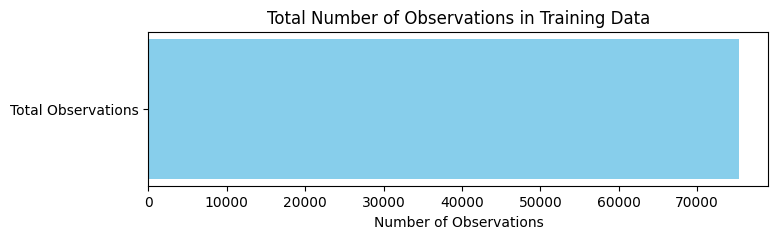

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
training_data_path = r"Data\finetuning_data\cti_training_data.csv"
training_data = pd.read_csv(training_data_path)

# Calculate the total number of observations
num_observations = len(training_data)

# Plotting
plt.figure(figsize=(8, 2))
plt.barh(['Total Observations'], [num_observations], color='skyblue')
plt.xlabel('Number of Observations')
plt.title('Total Number of Observations in Training Data')
plt.show()


## 4. Model Fine-Tuning

### 4.1. Overview
This section outlines the process of fine-tuning a pre-trained Large Language Model (LLM) for Cyber Threat Intelligence (CTI) tasks. It includes model configuration, quantization, adding adapters (LoRA), and training setup.


In [ ]:
import os
import huggingface_hub

huggingface_hub.login(token=os.environ.get('YOUR_huggingface_TOKEN'))

### 4.2. Data Preparation
- **Loading the Data:** Reads the CTI training data from a CSV file.
- **Splitting the Data:** Splits the dataset into training and validation sets using a 90/10 split.
- **Creating Datasets:** Converts the split data into the `Dataset` format required for training.

In [ ]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

training_data_path = r"Data\finetuning_data\cti_training_data.csv"

cti_train = pd.read_csv(training_data_path)

train_set, validation_set = train_test_split(cti_train, test_size=0.1, random_state=42)

train_dataset = Dataset.from_pandas(train_set)
validation_dataset = Dataset.from_pandas(validation_set)

### 4.3. Model Configuration


- **Loading the Model:**
  - **Model Name:** Uses the 7 billion parameter LLaMA model (`"meta-llama/Meta-Llama-3.1-8B-Instruct"`).
  - **Quantization Configuration:** Configures 4-bit precision to reduce model size and computation, with `torch.float16` as the compute type and `"nf4"` quantization.

- **Loading the Tokenizer:**
  - **Initialization:** Loads the tokenizer to process inputs.
  - **Special Token:** Adds `<PAD>` for padding sequences during training.

- **Configuring LoRA:**
  - **Purpose:** Adapts the model with low-rank matrices for efficient training.
  - **Configuration:** Sets LoRA with a rank of 8 for specific model modules and integrates it to enhance the model's performance.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import LoraConfig

# Load the 7b llama model
model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4"
)

# Load model
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=quantization_config)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
# Set it to a new token to correctly attend to EOS tokens.
tokenizer.add_special_tokens({'pad_token': '<PAD>'})

lora_config = LoraConfig(
    r=8,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    bias="none",
    task_type="CAUSAL_LM",
)

model.add_adapter(lora_config)

### 4.4. Training Setup

- **Formatting Function:**
  - **Purpose:** Formats input data for training by combining the user input and target output into a structured format.
  - **Implementation:** Uses a function to concatenate user and assistant texts into a single string with specific labels.

- **Training Arguments:**
  - **Configuration:** Defines training parameters such as batch size, learning rate, and number of steps.
  - **Settings:**
    - `per_device_train_batch_size`: Batch size per GPU/CPU.
    - `gradient_accumulation_steps`: Number of steps to accumulate gradients.
    - `learning_rate`: Initial learning rate.
    - `max_steps`: Total training steps.
    - `warmup_ratio`: Ratio of steps for learning rate warmup.
    - `save_steps` and `logging_steps`: Frequency of saving and logging.

- **Trainer Initialization:**
  - **Purpose:** Creates a `SFTTrainer` instance for model fine-tuning.
  - **Configuration:** Passes training arguments, datasets, tokenizer, and formatting function to the trainer.

- **Output Model Location:**
  - output_dir = `Models/llama-7b-qlora-CTI`


In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments


def formatting_func(example):
    text = f"### USER: {example['input_text']}\n### ASSISTANT: {example['target_output']}"
    return text


output_dir = "Models/llama-7b-qlora-CTI"
per_device_train_batch_size = 4
gradient_accumulation_steps = 4
optim = "paged_adamw_32bit"
save_steps = 10
logging_steps = 10
learning_rate = 2e-4
max_grad_norm = 0.3
max_steps = 1000
warmup_ratio = 0.03
lr_scheduler_type = "constant"

training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    lr_scheduler_type=lr_scheduler_type,
    gradient_checkpointing=True,
    push_to_hub=True,
)

trainer = SFTTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    packing=True,
    dataset_text_field="id",
    tokenizer=tokenizer,
    max_seq_length=1024,
    formatting_func=formatting_func,
)

### 4.5. Training Execution

- **Training Call:**
  - **Purpose:** Starts the training process using the previously configured `SFTTrainer`.
  - **Implementation:** Calls the `train()` method on the `SFTTrainer` instance to begin fine-tuning the model with the specified parameters and data.

In [ ]:
trainer.train()

## 5. Models Evaluation




Benchmark evaluation is essential for assessing model performance on CTI tasks. It involves comparing different models using standardized benchmarks to determine their effectiveness and suitability for real-world applications.

**Key Points:**

- **Evaluation Functions:** Specialized functions assess models on RCM, VSP, MCQ, and TTA tasks.
- **Benchmark Data:** Standard datasets are used for consistent measurement.
- **Models Compared:**
  - **Pre-trained LLaMA 3 Model**
  - **Fine-tuned LLaMA 3 Model with CTI Data**
  - **Google Gemini Model**
- **Evaluation Technique**: The same Evaluation Technique used in cti-bench

The same Evaluation Technique used in cti-bench

The evaluation aims to compare these models' performance, highlighting their strengths and areas for improvement.

In [ ]:

from model_evaluation.evaluation import evaluate_model

cti_rcm_benshmark = "Data\bench_data\cti-rcm.tsv"
cti_vsp_benshmark = "Data\bench_data\cti-vsp.tsv"
cti_mcq_benshmark = "Data\bench_data\cti-mcq.tsv"
cti_tta_benshmark = "Data\bench_data\cti-taa.tsv"

models = ["Meta-Llama-3.1-8B-Instruct", "llama-7b-qlora-CTI","Google_gemini_flash_1.5"]
scores = {}

for model in models : 
    rcm_score = evaluate_model(model,cti_rcm_benshmark)
    vsp_score = evaluate_model(model,cti_vsp_benshmark)
    mcq_score = evaluate_model(model,cti_mcq_benshmark)
    tta_score = evaluate_model(model,cti_tta_benshmark)
    score = {
        "model" : model,
        "rcm_score" : rcm_score,
        "vsp_score" : vsp_score,
        "mcq_score" : mcq_score,
        "tta_score" : tta_score
    }
    scores.append(scores)
    
df = pd.DataFrame(scores)


df.to_csv('model_evaluation\scores.csv', index=False)


### 5.1 Models Scores Comparisation

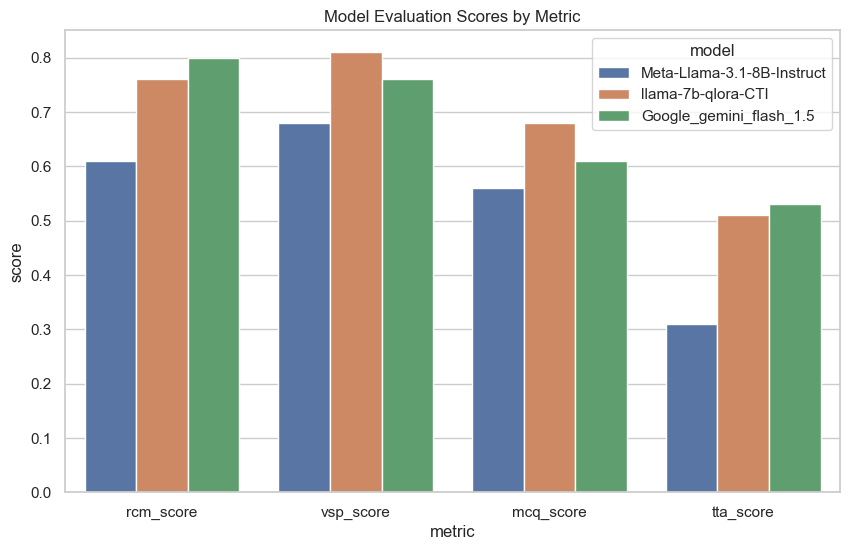

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load scores data
scores_path = 'model_evaluation/scores.csv'
scores = pd.read_csv(scores_path)

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Bar Plot
plt.figure(figsize=(10, 6))
scores_melted = scores.melt(id_vars='model', var_name='metric', value_name='score')
sns.barplot(x='metric', y='score', hue='model', data=scores_melted)
plt.title('Model Evaluation Scores by Metric')
plt.show()



### 5.2 Analysis and Insights



The evaluation results highlight several key insights:

- Fine-Tuned Model vs. Base Model: The fine-tuned LLaMA model, adapted with CTI-specific data, shows better performance in all areas compared to the base model. This improvement suggests that fine-tuning with specialized data makes the model more effective for CTI tasks.

- Comparison with Gemini Model: When comparing the fine-tuned LLaMA model to Google's Gemini model, the performance is very similar. Although the Gemini model has more parameters and might be stronger in other areas, the fine-tuned LLaMA model holds up well for CTI tasks.

## 6. Conclusion 


- This project shows that fine-tuning a pre-trained LLaMA model with CTI data makes it better at handling cybersecurity tasks than the base model. The fine-tuned LLaMA model performs almost as well as the Google Gemini model, showing that each model has its own strengths.

- In simple terms, customizing models for specific tasks can make them much more effective. Future work could look into new ways to fine-tune models and explore different designs to improve performance even more, not just in cybersecurity but in other areas too.